Saving GirlGIF.gif to GirlGIF.gif


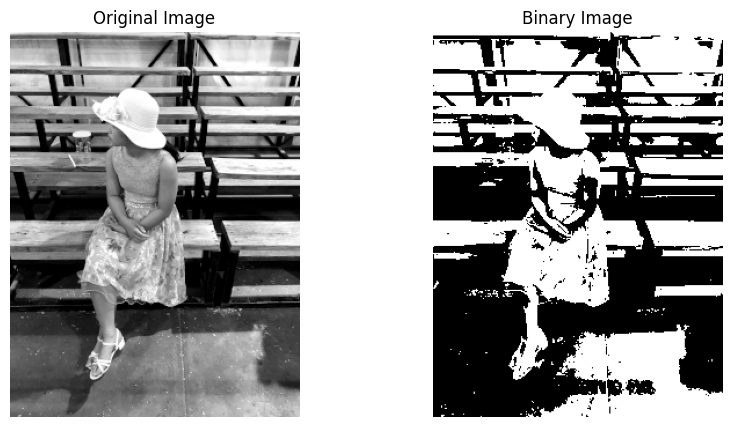

In [ ]:
# Import required modules from matplotlib for plotting images and numpy for numerical operations
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from google.colab import files
import os

# Prompt the user to upload an image file using an interactive file uploader
uploaded = files.upload()

# Define a list of possible image file extensions that we expect to be uploaded
file_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']

# Loop through the files in the current directory to find the first file that matches our list of image file extensions
# This assumes that an image file has been uploaded and it's the only file we're interested in processing
image_path = next((filename for filename in os.listdir() if any(filename.endswith(ext) for ext in file_extensions)), None)

# If no image file is found in the uploaded files, raise a ValueError to notify the user
if image_path is None:
    raise ValueError("No image file found in the uploaded files.")

# Read the image file using mpimg.imread which loads the image as a numpy array
image = mpimg.imread(image_path)

# If the image has 3 dimensions (such as an RGB image), convert it to grayscale by averaging across the color channels
# This step is crucial as the thresholding process requires a single channel to determine the binary outcome
if len(image.shape) == 3:
    gray_image = np.mean(image[:, :, :3], axis=2)  # Use only the first three channels for RGB
else:
    gray_image = image  # If the image is already in grayscale, use it as is

# Define a threshold value to classify pixels into binary values (0 or 1)
threshold_value = 128
# Apply the threshold to the grayscale image to create a binary image where pixels are either 0 (black) or 1 (white)
binary_image = gray_image > threshold_value

# Set up the plot for visualizing images
plt.figure(figsize=(10, 5))

# Display the original (grayscale) image
plt.subplot(1, 2, 1)  # This is the first subplot in a 1 row by 2 columns figure
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')  # Use a grayscale colormap
plt.axis('off')  # Turn off axis labels

# Display the binary (thresholded) image
plt.subplot(1, 2, 2)  # This is the second subplot in a 1 row by 2 columns figure
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')  # Again, use a grayscale colormap for the binary image
plt.axis('off')  # Turn off axis labels

# Render the plot to the screen
plt.show()
